In [1]:
# Installing the libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from pathlib import Path as path

import warnings
warnings.filterwarnings('ignore')

In [2]:
# paths for the directories
home_dir = path.cwd().parent                                  # home directory
data_dir = home_dir / 'data'                                  # data directory
iterim_data_dir = data_dir / 'interim'                        # interim data directory path
dataset_path = iterim_data_dir / "flat-house-dataset_v2.csv"  # dataset path

In [3]:
# loading the dataset into pandas dataframe
df = pd.read_csv(dataset_path)

# checking few rows from the dataset
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,servant room,others,pooja room,study room,store room,furnishing_type,luxury_score
0,flat,umang monsoon breeze,sector 78,0.95,5491.0,1730.0,Built Up area: 1730 (160.72 sq.m.),3.0,3,2,...,NaN,1730.00,NaN,0,0,0,0,0,0,65
1,flat,experion the heartsong,sector 108,1.68,8387.0,2003.0,Super Built up area 2003(186.08 sq.m.)Built Up...,3.0,3,3+,...,2003.0,1338.29,986.41,1,0,0,1,0,0,86
2,flat,umang winter hills,sector 77,0.75,5588.0,1342.0,Super Built up area 1342(124.68 sq.m.)Built Up...,2.0,2,2,...,1342.0,1140.00,969.00,0,0,0,0,1,0,102
3,flat,shree vardhman flora,sector 90,0.92,4717.0,1950.0,Carpet area: 1950 (181.16 sq.m.),3.0,3,2,...,NaN,NaN,1950.00,0,0,0,1,0,0,49
4,flat,dlf park place,sector 54,4.85,30180.0,1607.0,Super Built up area 1983(184.23 sq.m.)Built Up...,3.0,4,3+,...,1983.0,1785.00,1607.00,1,0,0,0,0,1,158


In [4]:
# Removing the duplicated rows
df = df.drop_duplicates()

In [5]:
# Shape of the dataset
print(f"Shape of the dataset: {df.shape}")

Shape of the dataset: (3668, 23)


In [6]:
# list of columns in the dataset
print(df.columns)

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'servant room', 'others', 'pooja room', 'study room', 'store room',
       'furnishing_type', 'luxury_score'],
      dtype='object')


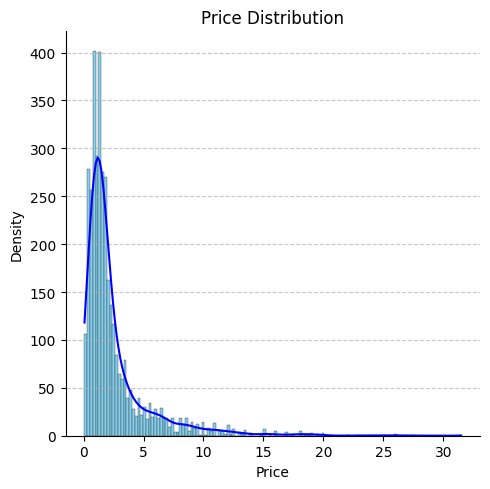

In [7]:
sns.displot(
    df["price"],
    kde=True,  # Maintain kernel density estimation
    color="Blue",  # Use a built-in color like "skyblue"
    facecolor='skyblue'
)

# Improve the look of the plot (same as before)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Density")
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add faint gridlines

plt.tight_layout()  # Adjust spacing to prevent clipping
plt.show()


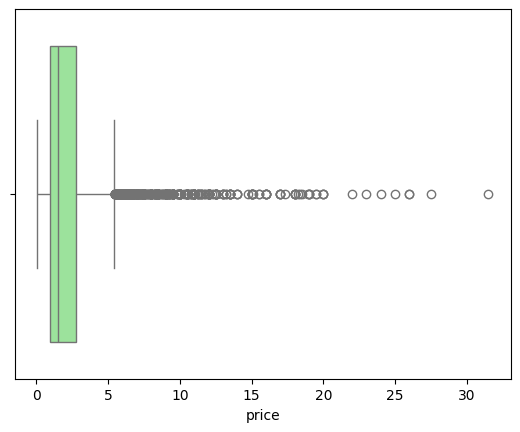

In [8]:
# boxplot
sns.boxplot(df['price'], 
            color='lightgreen',
            orient='h');

In [9]:
# Calculating the IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1 

# define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# identifying the outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Displaying the number of outliers and some stats about these outliers
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

print(f"Outliers Found in the 'price' feature: {num_outliers}\n"
      f"\nStatistics about the outliers:\n{outliers_price_stats}")


Outliers Found in the 'price' feature: 424

Statistics about the outliers:
count    424.000000
mean       9.240896
std        4.068606
min        5.460000
25%        6.455000
50%        8.000000
75%       10.750000
max       31.500000
Name: price, dtype: float64


In [10]:
# checking the outlier rows from the dataset
outliers.sort_values('price', ascending=False).head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,servant room,others,pooja room,study room,store room,furnishing_type,luxury_score
2068,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.5,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7.0,9,3+,...,NaN,9000.0,NaN,1,0,1,1,1,1,74
3226,house,independent,sector 43,27.5,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6.0,7,3+,...,NaN,11286.0,NaN,1,1,1,1,0,0,42
2833,house,dlf city plots,sector 26,26.0,57206.0,4545.0,Plot area 505(422.24 sq.m.),6.0,7,3+,...,NaN,4545.0,NaN,1,1,1,1,0,0,138
1259,house,independent,sector 26,26.0,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16.0,16,3+,...,NaN,400.0,350.0,1,0,1,1,1,1,72
2688,house,suncity township,sector 54,25.0,31111.0,8036.0,Plot area 1000(836.13 sq.m.),4.0,4,3+,...,NaN,1000.0,NaN,1,0,1,1,1,2,0


#### Key Obeservation: 
On the basis of price column we can say that there are some genuine outliers but there are some data errors as well

### Price_per_sqft

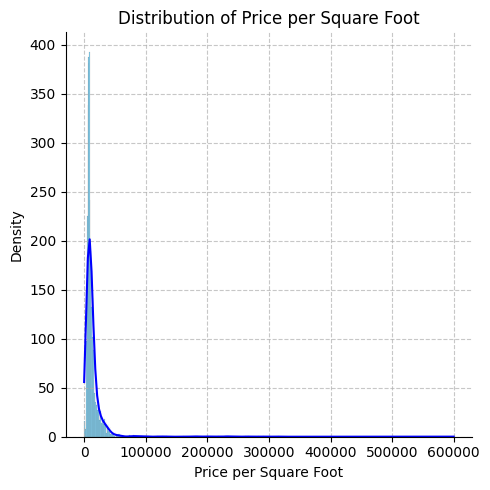

In [11]:
# plotting the distplot
sns.displot(
    df['price_per_sqft'],
    kde=True,  # Maintain kernel density estimation
    color="Blue",  # Use a built-in color like "skyblue"
    facecolor='skyblue',
    )

plt.title("Distribution of Price per Square Foot")
plt.xlabel("Price per Square Foot")
plt.ylabel("Density")
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add faint gridlines
plt.grid(axis="x", linestyle="--", alpha=0.7)  # Add faint gridlines


plt.tight_layout()  # Adjust spacing to prevent clipping
plt.show()

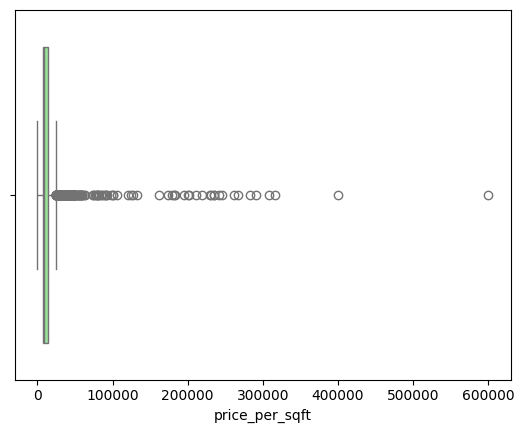

In [12]:
# boxplot
sns.boxplot(df['price_per_sqft'], 
            color='lightgreen',
            orient='h');

In [13]:
# Calculating the IQR
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1 

# define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# identifying the outliers
outliers_sqft = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

# Displaying the number of outliers and some stats about these outliers
num_outliers = outliers_sqft.shape[0]
outliers_price_per_sqft_stats = outliers_sqft['price_per_sqft'].describe()

print(f"Outliers Found in the 'price_per_sqft' feature: {num_outliers}\n"
      f"\nStatistics about the outliers:\n{outliers_price_per_sqft_stats}")


Outliers Found in the 'price_per_sqft' feature: 354

Statistics about the outliers:
count       354.000000
mean      52592.612994
std       61150.458507
min       24489.000000
25%       28208.250000
50%       33368.500000
75%       41982.250000
max      600000.000000
Name: price_per_sqft, dtype: float64


In [14]:
# some area mentioned the dataset are present in 'yard' unit, we will change it to 'sqft' unit
outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x: x*9 if x < 1000 else x)

In [15]:
# updating the 'price_per_sqft' column
outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000) / outliers_sqft['area'])

In [16]:
# checking the stats updating the dataset
outliers_sqft['price_per_sqft'].describe()

count      354.000000
mean     29357.906780
std      12403.077309
min       2723.000000
25%      25562.000000
50%      29870.500000
75%      35549.500000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [17]:
# updating the original dataframe
df.update(outliers_sqft)

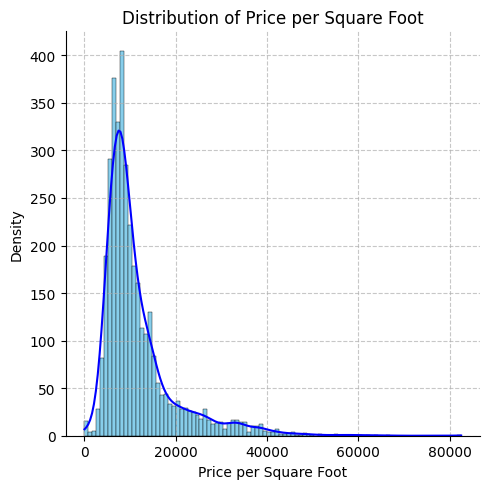

In [18]:
# plotting the distplot
sns.displot(
    df['price_per_sqft'],
    kde=True,  # Maintain kernel density estimation
    color="Blue",  # Use a built-in color like "skyblue"
    facecolor='skyblue',
    )

plt.title("Distribution of Price per Square Foot")
plt.xlabel("Price per Square Foot")
plt.ylabel("Density")
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add faint gridlines
plt.grid(axis="x", linestyle="--", alpha=0.7)  # Add faint gridlines


plt.tight_layout()  # Adjust spacing to prevent clipping
plt.show()

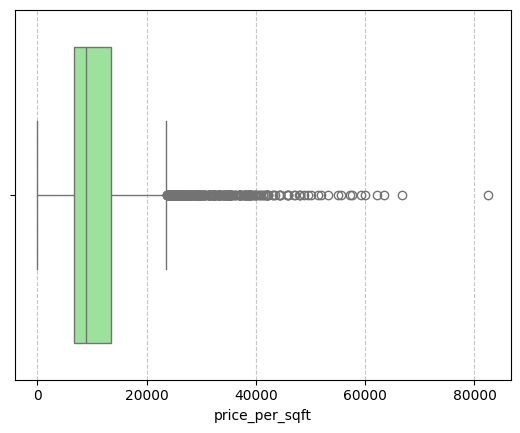

In [19]:
# boxplot
sns.boxplot(df['price_per_sqft'], 
            color='lightgreen',
            orient='h')

plt.grid(axis="x", linestyle="--", alpha=0.7)  # Add faint gridlines

In [20]:
df[df['price_per_sqft']>50000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,servant room,others,pooja room,study room,store room,furnishing_type,luxury_score
596,house,emaar the palm springs,sector 54,24.00,66667.0,3600.0,Plot area 400(37.16 sq.m.),5.0,5,2,...,NaN,400.0,NaN,1,0,1,1,0,0,122
905,house,cloudnine cottages,sector 2,5.50,55000.0,1000.0,Plot area 1000(92.9 sq.m.),3.0,3,0,...,NaN,1000.0,NaN,0,0,0,0,0,2,0
1143,house,unitech escape,sector 50,10.80,60000.0,1800.0,Plot area 290(242.48 sq.m.)Built Up area: 250 ...,4.0,4,3,...,NaN,250.0,200.0,1,0,1,1,1,0,103
1171,house,nul,sector 28,12.50,51440.0,2430.0,Plot area 270(225.75 sq.m.),16.0,17,3+,...,NaN,2430.0,NaN,1,1,1,1,0,1,137
1193,flat,unitech vistas,sector 70,9.00,57508.0,1565.0,Built Up area: 1565 (145.39 sq.m.),3.0,3,0,...,NaN,1565.0,NaN,0,0,0,0,0,2,0
1259,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16.0,16,3+,...,NaN,400.0,350.0,1,0,1,1,1,1,72
1495,house,emaar mgf marbella,sector 66,18.00,55556.0,3240.0,Plot area 360(301.01 sq.m.),4.0,4,3+,...,NaN,3240.0,NaN,1,0,1,1,0,1,75
1530,house,project housing board colony,sector 31,8.00,63492.0,1260.0,Built Up area: 140 (117.06 sq.m.),2.0,1,0,...,NaN,140.0,NaN,0,0,0,0,0,2,0
1600,house,malibu towne,sector 47,8.50,53125.0,1600.0,Built Up area: 1600 (148.64 sq.m.),12.0,12,3+,...,NaN,1600.0,NaN,0,0,0,0,0,0,99
2148,house,emaar the palm springs,sector 54,14.00,62222.0,2250.0,Plot area 250(209.03 sq.m.),4.0,5,3+,...,NaN,2250.0,NaN,1,0,0,1,0,0,160


In [21]:
# we will considering rows where 'price_per_sqft' is less than 50000
df = df[df['price_per_sqft']<=50000]

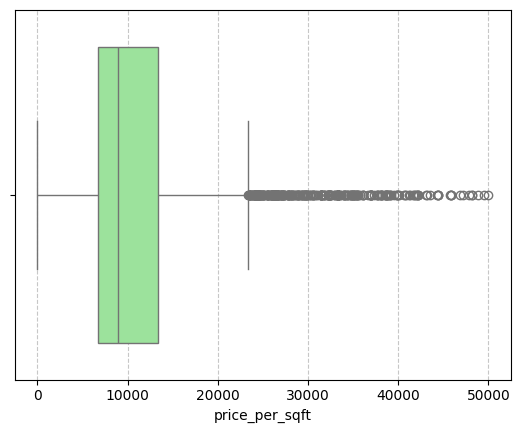

In [22]:
# boxplot
sns.boxplot(
    df['price_per_sqft'], 
    color='lightgreen',
    orient='h');

plt.grid(axis="x", linestyle="--", alpha=0.7)  # Add faint gridlines

### Area

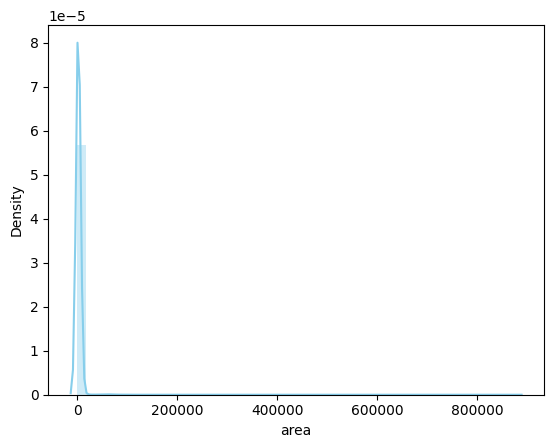

In [23]:
sns.distplot(df['area'], color='Skyblue');

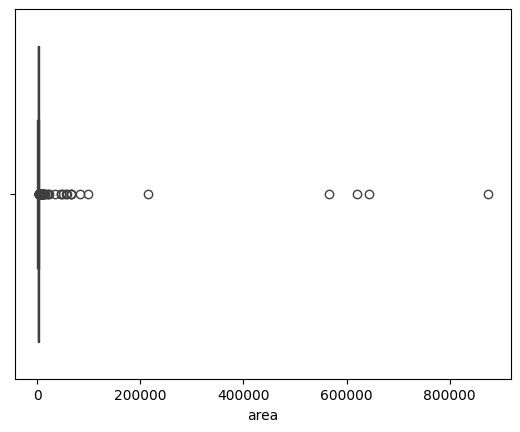

In [24]:
sns.boxplot(df['area'], orient='h');

In [25]:
df['area'].describe()

count      3638.000000
mean       2950.548653
std       23236.672174
min         145.000000
25%        1262.000000
50%        1750.000000
75%        2350.000000
max      875000.000000
Name: area, dtype: float64

In [26]:
df[df['area'] > 100000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,servant room,others,pooja room,study room,store room,furnishing_type,luxury_score
109,flat,ramsons kshitij,sector 95,0.31,5.0,620000.0,Carpet area: 607936 (56479.1 sq.m.),2.0,2,1,...,NaN,NaN,607936.0,0,1,0,1,0,2,65
220,house,independent,sector 50,5.00,232.0,215517.0,Plot area 2(1011.71 sq.m.),6.0,5,3+,...,NaN,2.0,NaN,1,1,1,1,0,0,0
617,flat,signature global solera 2,sector 107,0.51,9.0,566667.0,Carpet area: 514396 (47788.95 sq.m.),2.0,2,1,...,NaN,NaN,514396.0,0,0,0,0,0,2,44
3603,flat,signature the roselia,sector 95,0.45,7.0,642857.0,Carpet area: 569243 (52884.41 sq.m.),2.0,2,2,...,NaN,NaN,569243.0,0,0,0,0,0,2,76
3625,flat,hcbs sports ville,sector 2,0.35,4.0,875000.0,Built Up area: 737147 (68483.2 sq.m.),2.0,2,2,...,NaN,737147.0,NaN,0,0,0,0,0,1,44


In [27]:
df = df[df['area'] < 100000]

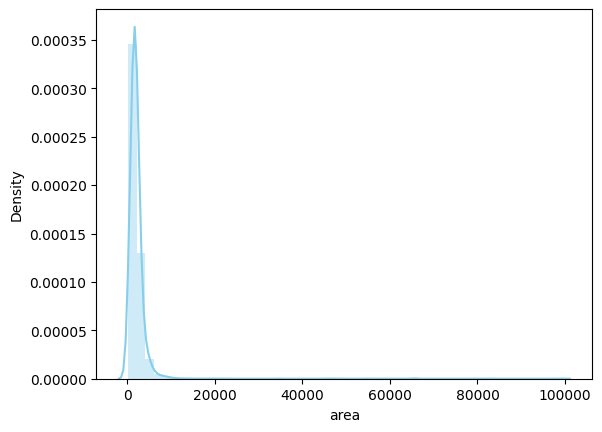

In [28]:
sns.distplot(df['area'], color='Skyblue');

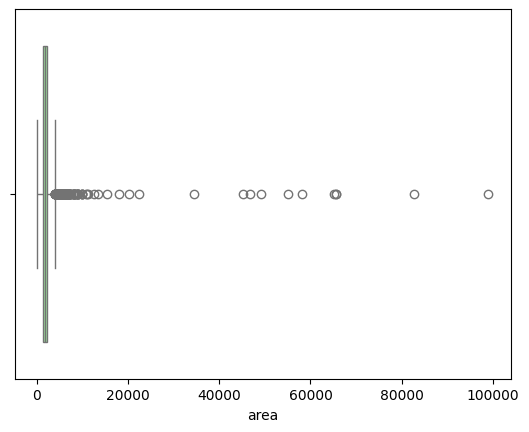

In [29]:
sns.boxplot(x=df['area'], color='lightgreen');

In [30]:
df[df['area'] > 10000].sort_values('area',ascending=False)

# 1865	2207 887 1227 196 1745 2507	589 1138

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,servant room,others,pooja room,study room,store room,furnishing_type,luxury_score
1865,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6.0,8,3+,...,NaN,NaN,11000.00,1,0,1,0,1,0,60
168,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10.0,6,2,...,NaN,115.0,NaN,0,1,0,0,0,2,7
2207,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3.0,2,1,...,NaN,NaN,64412.00,0,0,0,0,0,2,51
887,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2.0,2,2,...,NaN,NaN,64529.00,0,0,0,1,0,2,15
3268,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10.0,10,3+,...,NaN,NaN,7250.00,0,0,0,0,0,2,0
1227,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2.0,2,1,...,NaN,NaN,58141.00,0,0,0,0,0,2,15
196,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2.0,2,1,...,NaN,NaN,54917.00,0,0,0,0,0,2,37
1745,flat,signature the serenas,sector 2,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1.0,1,2,...,NaN,NaN,48811.00,0,0,0,1,0,2,37
876,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9.0,9,2,...,NaN,5800.0,5200.00,1,0,0,0,1,0,109
2507,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2.0,2,1,...,NaN,NaN,45966.00,0,1,0,0,0,2,33


In [31]:
# removing the outliers from the above dataset
# outliers were decided by manually checking each row in above dataframe
# some rows were not making sense, as some has relatively small area compare to the number of bedrooms 
# some rows has huge area but, were having less number of bedroom compare to other data points

df.drop(index=[1865,2207, 887, 1227, 196, 1745, 2507, 589, 1138], inplace=True)


In [33]:
df[df['area'] > 10000].sort_values('area', ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,servant room,others,pooja room,study room,store room,furnishing_type,luxury_score
168,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10.0,6,2,...,NaN,115.0,NaN,0,1,0,0,0,2,7
3268,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10.0,10,3+,...,NaN,NaN,7250.00,0,0,0,0,0,2,0
876,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9.0,9,2,...,NaN,5800.0,5200.00,1,0,0,0,1,0,109
3488,house,independent,sector 57,6.25,2778.0,22498.0,Plot area 3100(2591.99 sq.m.)Built Up area: 26...,9.0,9,3+,...,NaN,2660.0,2500.00,1,0,0,0,0,0,61
2128,house,independent,sector 43,5.50,2716.0,20250.0,Plot area 215(179.77 sq.m.)Built Up area: 2850...,8.0,7,3+,...,NaN,2850.0,2250.00,1,1,1,1,0,0,123
1502,flat,godrej air,sector 85,2.50,1379.0,18129.0,Carpet area: 18122 (1683.59 sq.m.),4.0,5,3+,...,NaN,NaN,18122.00,0,1,1,1,0,0,44
2711,house,unitech aspen greens,sector 50,6.95,4490.0,15479.0,Plot area 240(200.67 sq.m.)Built Up area: 2160...,3.0,3,1,...,NaN,2160.0,1720.00,1,0,0,0,0,2,160
488,flat,godrej icon,sector 88a,1.75,1384.0,12645.0,Carpet area: 1175.11,3.0,3,3+,...,NaN,NaN,1175.11,0,0,0,0,0,2,55
3226,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6.0,7,3+,...,NaN,11286.0,NaN,1,1,1,1,0,0,42
567,flat,m3m golfestate,sector 65,13.20,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4.0,4,3,...,NaN,NaN,11000.00,1,0,0,0,0,2,60


In [47]:
df.loc[168, 'area'] = 115 * 9
df.loc[876, 'area'] = 5800
df.loc[488, 'area'] = 1175
df.loc[2128, 'area'] = 2850 
df.loc[3268, 'area'] = 7250 
df.loc[3488, 'area'] = 2660 
df.loc[1502, 'area'] = 1812
df.loc[2711, 'area'] = 2160

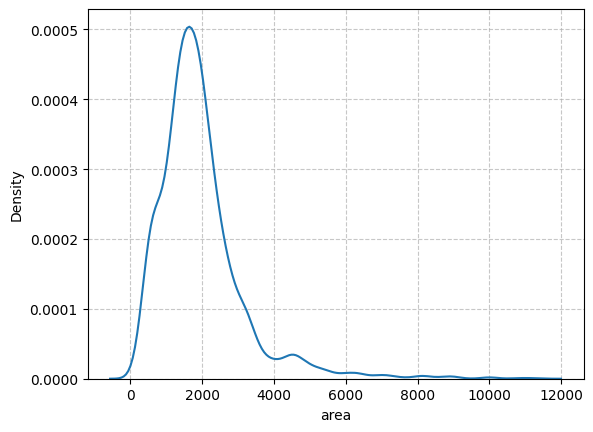

In [53]:
sns.kdeplot(df['area'])
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add faint gridlines
plt.grid(axis="x", linestyle="--", alpha=0.7)  # Add faint gridlines

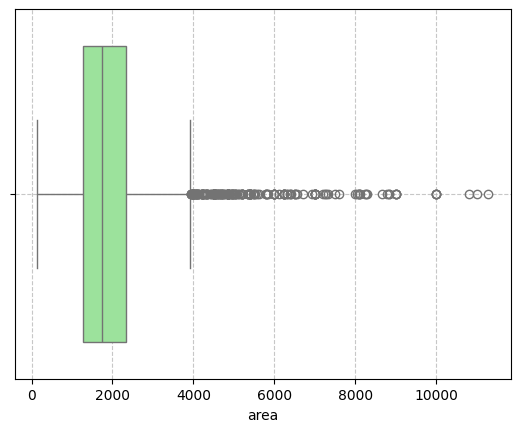

In [56]:
sns.boxplot(df['area'], orient='h', color='lightgreen')
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add faint gridlines
plt.grid(axis="x", linestyle="--", alpha=0.7)  # Add faint gridlines

In [57]:
# checking the stats
df['area'].describe()

count     3624.000000
mean      1950.716060
std       1214.323422
min        145.000000
25%       1261.000000
50%       1749.500000
75%       2329.750000
max      11286.000000
Name: area, dtype: float64

### Feature in Focus: `Bedroom`

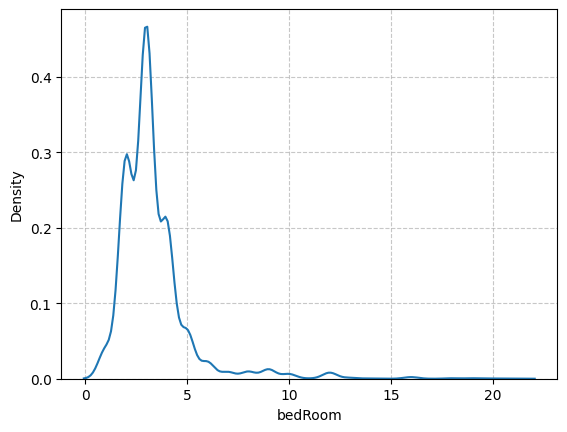

In [59]:
sns.kdeplot(df['bedRoom'])
plt.grid(axis='y', linestyle = '--', alpha=0.7)
plt.grid(axis='x', linestyle = '--', alpha=0.7)

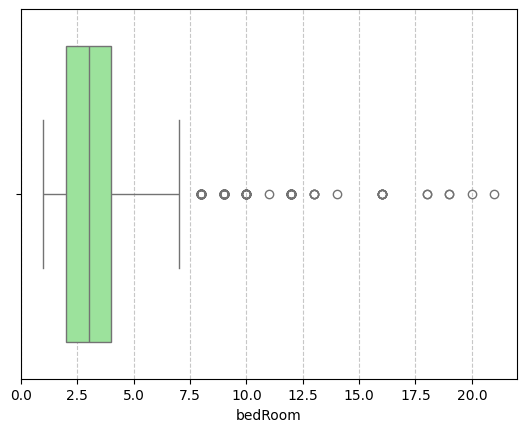

In [67]:
sns.boxplot(df['bedRoom'], orient='h', color='lightgreen')
plt.grid(axis='x', linestyle='--', alpha=0.7)

In [68]:
# checking the stats
df['bedRoom'].describe()

count    3624.000000
mean        3.335541
std         1.831577
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

In [69]:
# checking the properties have bedrooms higher than 10 nos
df[df['bedRoom'] > 10].sort_values('bedRoom', ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,servant room,others,pooja room,study room,store room,furnishing_type,luxury_score
771,house,independent,sector 54,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21.0,21,3+,...,NaN,1161.0,NaN,1,0,0,0,0,1,49
1134,house,independent,sector 43,4.50,39062.0,1152.0,Plot area 128(107.02 sq.m.),20.0,20,3+,...,NaN,1152.0,NaN,1,0,0,0,0,1,22
3015,house,independent,sector 17a,3.87,5160.0,7500.0,Plot area 1623(150.78 sq.m.)Built Up area: 750...,19.0,17,3+,...,NaN,7500.0,NaN,0,0,0,1,1,2,68
1079,house,independent,sector 17a,3.93,24214.0,1623.0,Plot area 1623(150.78 sq.m.)Built Up area: 162...,19.0,17,3,...,NaN,1622.0,NaN,1,0,1,1,1,2,74
1781,house,private house,sector 55,7.05,46906.0,1503.0,Plot area 167(139.63 sq.m.),18.0,18,3+,...,NaN,1503.0,NaN,0,1,0,0,0,1,57
3043,house,independent,sector 54,5.50,38194.0,1440.0,Plot area 160(133.78 sq.m.),18.0,18,3+,...,NaN,1440.0,NaN,1,0,0,0,0,1,70
8,house,independent,sector 43,13.50,50000.0,2700.0,Plot area 300(250.84 sq.m.),16.0,16,3+,...,NaN,2700.0,NaN,1,1,1,1,0,2,41
69,house,independent,sector 40,12.00,38986.0,3078.0,Plot area 342(285.96 sq.m.),16.0,16,3+,...,NaN,3078.0,NaN,1,0,1,1,1,0,0
3485,house,dlf city plots,sector 26,20.00,44267.0,4518.0,Plot area 502(419.74 sq.m.),16.0,20,3+,...,NaN,4518.0,NaN,1,0,1,1,1,0,153
3061,house,luxury dlf city floors,sector 26,20.00,48888.0,4091.0,Plot area 500(418.06 sq.m.),16.0,16,3+,...,NaN,500.0,NaN,1,0,0,0,0,0,31


In [70]:
df = df[df['bedRoom'] <= 10]

In [71]:
df.shape

(3579, 23)

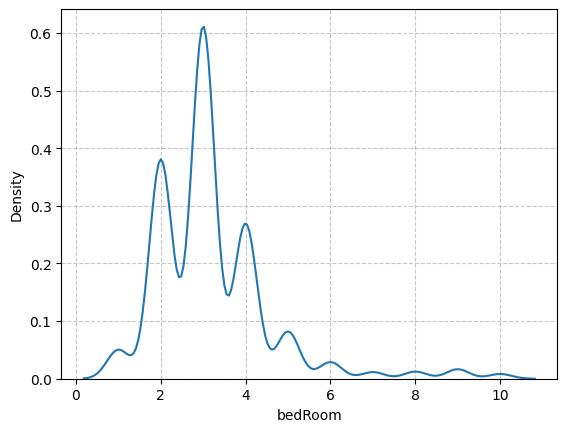

In [73]:
sns.kdeplot(df['bedRoom'])
plt.grid(axis='x', linestyle= '--', alpha=0.7)
plt.grid(axis='y', linestyle= '--', alpha=0.7)

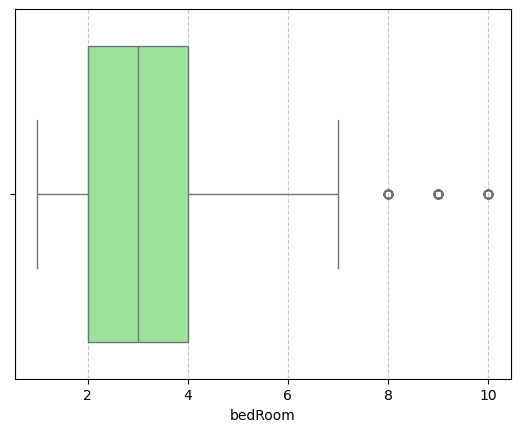

In [83]:
sns.boxplot(df['bedRoom'], orient='h', color='lightgreen')
plt.grid(axis='x', linestyle='--', alpha=0.7)

In [75]:
df['bedRoom'].describe()

count    3579.000000
mean        3.205365
std         1.394918
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: bedRoom, dtype: float64

### Feature in Focus: `Bathroom`

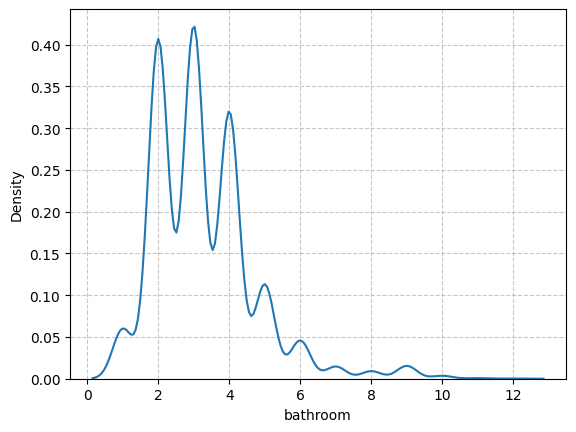

In [80]:
sns.kdeplot(df['bathroom'])
plt.grid(axis='both', linestyle='--', alpha=0.7)

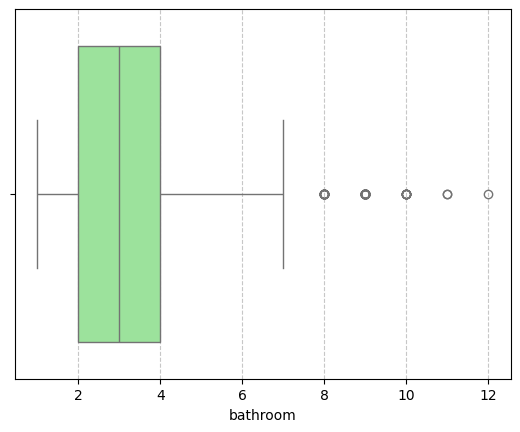

In [84]:
sns.boxplot(df['bathroom'], orient='h', color='lightgreen')
plt.grid(axis='x', linestyle='--', alpha=0.7)

In [86]:
df[df['bathroom'] > 10].sort_values('bathroom', ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,servant room,others,pooja room,study room,store room,furnishing_type,luxury_score
2220,house,adani brahma samsara,sector 60,18.02,28200.0,6390.0,Built Up area: 6390 (593.65 sq.m.),9.0,12,3+,...,NaN,6390.0,NaN,1,0,0,0,0,0,146
2448,house,independent,sector 24,11.00,28902.0,3806.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8.0,11,3+,...,NaN,5000.0,NaN,1,1,1,1,0,0,39
2816,house,independent,sector 39,7.00,10000.0,7000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,10.0,11,3+,...,NaN,7000.0,NaN,0,0,1,0,0,1,38


### Feature in Focus: `Super Built Up Area`

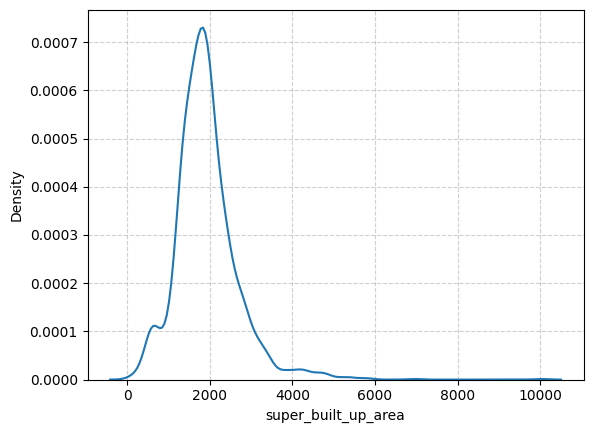

In [90]:
sns.kdeplot(df['super_built_up_area'])
plt.grid(axis='both', linestyle='--', alpha=0.6)

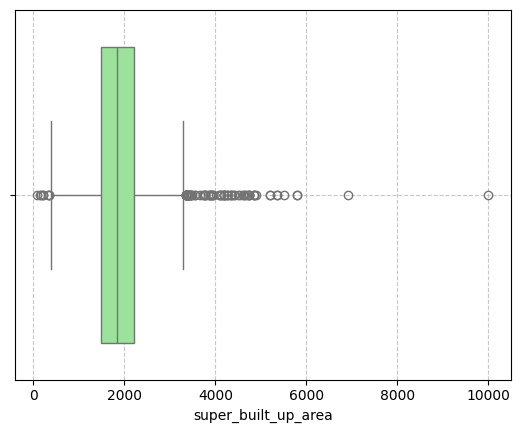

In [91]:
sns.boxplot(df['super_built_up_area'], orient='h', color='lightgreen')
plt.grid(axis='both', linestyle='--', alpha=0.7)

In [92]:
df['super_built_up_area'].describe()

count     1873.000000
mean      1923.104939
std        758.752609
min         89.000000
25%       1479.000000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

In [95]:
df[df['super_built_up_area'] > 6000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,servant room,others,pooja room,study room,store room,furnishing_type,luxury_score
2346,flat,bestech park view grand spa,sector 81,4.7,6786.0,6926.0,Super Built up area 6926(643.45 sq.m.),4.0,4,3+,...,6926.0,NaN,NaN,1,0,0,0,0,0,140
3517,flat,krrish provence estate,sector 2,7.5,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5.0,6,3+,...,10000.0,NaN,NaN,1,1,1,0,0,2,49


### Feature in Focus: `built up area`

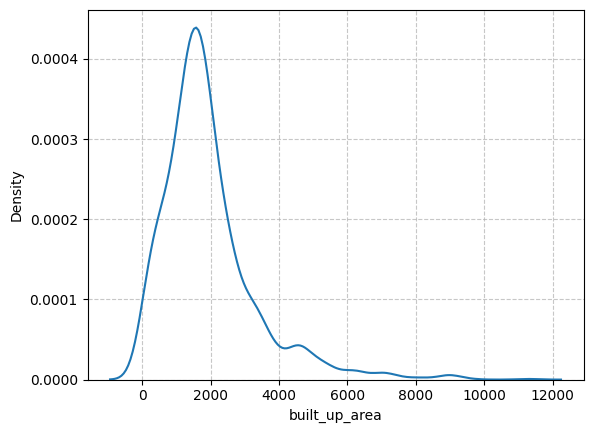

In [96]:
sns.kdeplot(df['built_up_area'])
plt.grid(axis='both', linestyle='--', alpha=0.7)

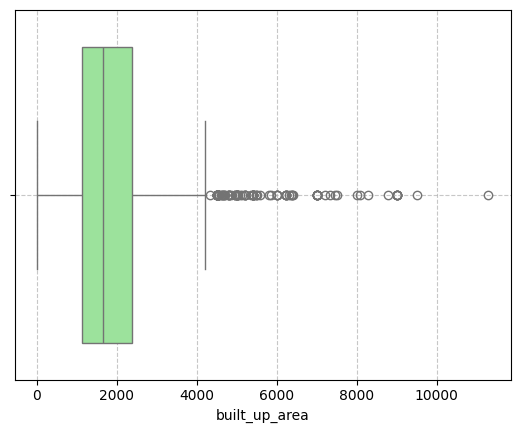

In [97]:
sns.boxplot(df['built_up_area'], orient='h', color='lightgreen')
plt.grid(axis='both', linestyle='--', alpha=0.7)

In [98]:
df[df['built_up_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,servant room,others,pooja room,study room,store room,furnishing_type,luxury_score
3226,house,independent,sector 43,27.5,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6.0,7,3+,...,NaN,11286.0,NaN,1,1,1,1,0,0,42


### Feature in Focus: `carpet area`

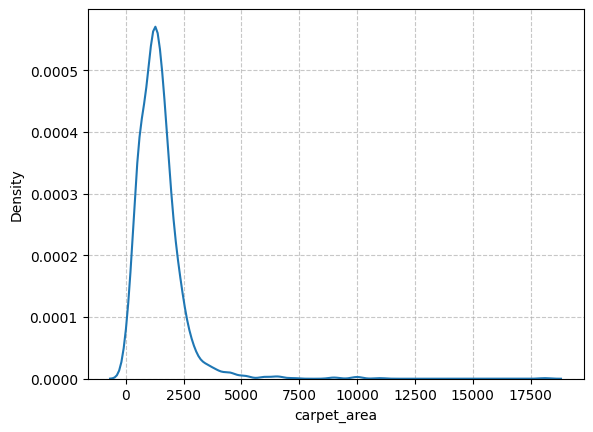

In [99]:
sns.kdeplot(df['carpet_area'])
plt.grid(axis='both', linestyle='--', alpha=0.7)

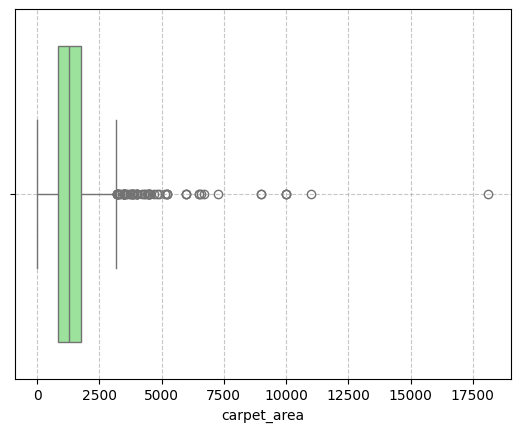

In [100]:
sns.boxplot(df['carpet_area'], orient='h', color='lightgreen')
plt.grid(axis='both', linestyle='--', alpha=0.7)

In [101]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,servant room,others,pooja room,study room,store room,furnishing_type,luxury_score
567,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4.0,4,3,...,NaN,NaN,11000.0,1,0,0,0,0,2,60
1502,flat,godrej air,sector 85,2.5,1379.0,1812.0,Carpet area: 18122 (1683.59 sq.m.),4.0,5,3+,...,NaN,NaN,18122.0,0,1,1,1,0,0,44


In [103]:
df.loc[1502, 'carpet_area'] = 1812

In [104]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,servant room,others,pooja room,study room,store room,furnishing_type,luxury_score
567,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4.0,4,3,...,NaN,NaN,11000.0,1,0,0,0,0,2,60


### Feature in Focus: `luxury Score`

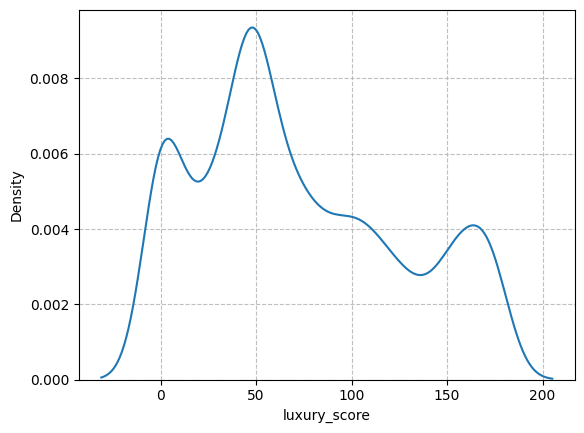

In [105]:
sns.kdeplot(df['luxury_score'])
plt.grid(axis='both', linestyle='--', alpha=0.8)

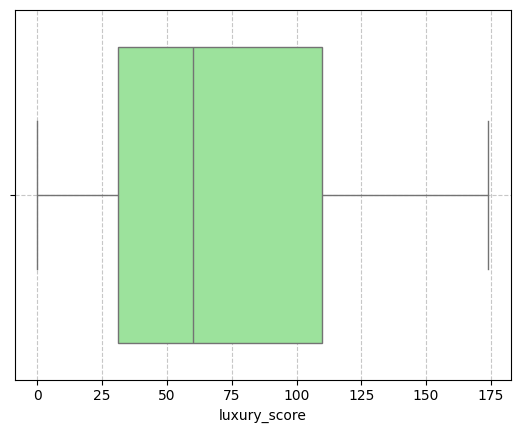

In [106]:
sns.boxplot(df['luxury_score'], orient='h', color='lightgreen')
plt.grid(axis='both', linestyle='--', alpha=0.7)

In [107]:
df.shape

(3579, 23)

In [108]:
df['price_per_sqft'] = round(df['price'] * 10000000 / df['area'])

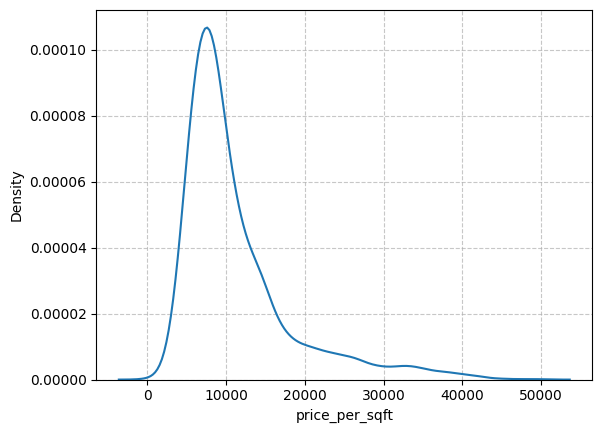

In [109]:
sns.kdeplot(df['price_per_sqft'])
plt.grid(axis='both', linestyle='--', alpha=0.7)

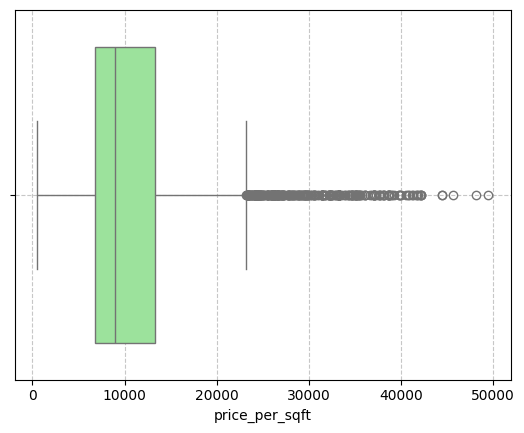

In [110]:
sns.boxplot(df['price_per_sqft'], orient='h', color='lightgreen')
plt.grid(axis='both', linestyle='--', alpha=0.7)

In [111]:
df[df['price_per_sqft'] > 42000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,servant room,others,pooja room,study room,store room,furnishing_type,luxury_score
340,house,independent,sector 26,20.0,44444.0,4500.0,Plot area 500(418.06 sq.m.),5.0,7,3+,...,NaN,4500.0,NaN,1,0,1,0,0,1,97
958,house,independent,sector 55,5.0,44444.0,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9.0,9,3+,...,NaN,115.0,100.0,0,1,0,0,0,0,44
1380,house,independent,sector 25,13.0,45710.0,2844.0,Plot area 316(264.22 sq.m.),6.0,8,3+,...,NaN,2844.0,NaN,1,0,1,1,1,1,0
1808,house,sushant lok 1 builder floors,sector 43,13.0,48148.0,2700.0,Plot area 300(250.84 sq.m.),3.0,3,3+,...,NaN,2700.0,NaN,0,0,1,0,0,0,7
1875,house,independent,sector 26,19.0,42222.0,4500.0,Plot area 500(418.06 sq.m.),6.0,8,3+,...,NaN,4500.0,NaN,1,0,1,1,1,0,103
2428,house,independent,sector 43,9.5,42222.0,2250.0,Plot area 302(252.51 sq.m.)Built Up area: 300 ...,5.0,5,3+,...,NaN,300.0,250.0,1,0,1,0,0,0,88
2661,house,dlf city plots,sector 26,19.0,42054.0,4518.0,Plot area 502(419.74 sq.m.),6.0,6,3,...,NaN,4518.0,NaN,1,0,0,1,0,0,121
3144,house,independent,sector 28,12.0,42194.0,2844.0,Plot area 316(264.22 sq.m.),4.0,5,3+,...,NaN,2844.0,NaN,1,0,1,0,1,0,60
3668,house,independent,sector 105,9.9,49500.0,2000.0,Built Up area: 2000 (185.81 sq.m.)Carpet area:...,2.0,2,2,...,NaN,2000.0,1800.0,0,0,0,0,0,2,0


In [112]:
x = df[df['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.02)

183.33333333333334

In [113]:
df[(df['area']/df['bedRoom'])<183]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,servant room,others,pooja room,study room,store room,furnishing_type,luxury_score
155,house,rattan garden,sector 7,0.83,17585.0,472.0,Carpet area: 472 (43.85 sq.m.),5.0,3,2,...,NaN,NaN,472.0,0,0,0,0,0,2,0
168,house,ganpati heights apartment,sector 13,1.25,12077.0,1035.0,Plot area 115(7692.86 sq.m.),10.0,6,2,...,NaN,115.0,NaN,0,1,0,0,0,2,7
169,house,independent,sector 2,1.20,22305.0,538.0,Plot area 50,4.0,4,3+,...,NaN,535.0,NaN,0,0,0,0,0,2,8
207,house,not applicable,sector 4,0.75,11719.0,640.0,Plot area 640(59.46 sq.m.),5.0,4,3,...,NaN,640.0,NaN,0,0,0,0,0,2,0
351,house,jacob pura,sector 12,0.35,9722.0,360.0,Built Up area: 360 (33.45 sq.m.),2.0,1,0,...,NaN,360.0,NaN,0,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3579,house,sai kripa floors 5,sector 11,0.90,11250.0,800.0,Plot area 800(74.32 sq.m.),5.0,5,3,...,NaN,800.0,NaN,0,0,0,0,0,2,0
3679,house,independent,sector 104,0.45,12162.0,370.0,Plot area 370(34.37 sq.m.)Carpet area: 1500 sq...,4.0,4,2,...,NaN,NaN,1500.0,0,0,0,0,0,0,7
3758,house,independent,sector 47,0.99,17188.0,576.0,Plot area 64(53.51 sq.m.),4.0,4,3,...,NaN,576.0,NaN,0,0,0,0,0,2,13
3772,house,independent,sector 17,0.32,5664.0,565.0,Built Up area: 565 (52.49 sq.m.),5.0,1,0,...,NaN,565.0,NaN,0,0,0,0,0,2,0


In [114]:
# considering 5 percentile
x = df[df['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.05)

251.5

In [117]:
df[df['area']/df['bedRoom'] < 250].sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,servant room,others,pooja room,study room,store room,furnishing_type,luxury_score
400,house,rajendra park gurgaon,sector 105,0.37,10278.0,360.0,Plot area 360(33.45 sq.m.),4.0,3,2,...,NaN,360.0,NaN,0,0,0,0,0,2,0
52,flat,central park flower valley,sector 33,1.40,21538.0,650.0,Super Built up area 650(60.39 sq.m.),3.0,3,3,...,650.0,NaN,NaN,0,0,0,0,0,2,54
3041,house,sector 38 rwa,sector 38,4.30,28782.0,1494.0,Plot area 166(138.8 sq.m.)Built Up area: 165 s...,9.0,9,3+,...,NaN,165.0,164.0,0,1,1,0,0,0,41
3413,house,independent,sector 4,1.10,6111.0,1800.0,Plot area 200(167.23 sq.m.),8.0,4,3+,...,NaN,1800.0,NaN,0,0,0,0,0,2,7
2309,flat,breez global heights 88a,sector 88a,0.50,8375.0,597.0,Carpet area: 597 (55.46 sq.m.),3.0,2,2,...,NaN,NaN,597.0,0,0,0,0,0,2,15


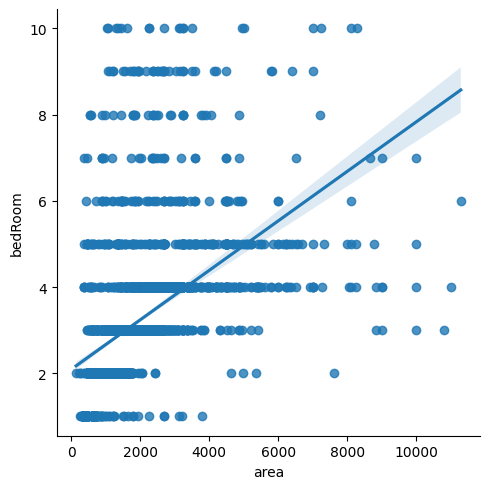

In [119]:
sns.lmplot(data=df, x='area', y='bedRoom');

In [120]:
df['area_room_ratio'] = df['area'] / df['bedRoom']

In [124]:
(df[df['area_room_ratio'] < 250])['bedRoom'].value_counts()

bedRoom
2.0     47
3.0     33
5.0     28
4.0     17
6.0     17
9.0     15
8.0     12
10.0     8
7.0      8
Name: count, dtype: int64

In [128]:
df = df[df['area_room_ratio'] > 100]

In [132]:
outliers_df = df[(df['area_room_ratio'] < 250) & (df['bedRoom'] > 3)]

In [134]:
outliers_df['bedRoom'] = round(outliers_df['bedRoom'] / outliers_df['floorNum'])

In [135]:
df.update(outliers_df)

In [136]:
# as we have modified the values in 'bedRoom' column in above operations
df['area_room_ratio'] = df['area'] / df['bedRoom']

In [138]:
df[(df['area_room_ratio'] < 250) & (df['bedRoom'] > 4)]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,servant room,others,pooja room,study room,store room,furnishing_type,luxury_score,area_room_ratio
497,house,independent,sector 11,3.50,15556.0,2250.0,Built Up area: 2250 (209.03 sq.m.),10.0,1,0,...,2250.0,NaN,0,0,0,0,0,2,0,225.000000
821,house,independent,sector 2,0.98,9074.0,1080.0,Carpet area: 120 (100.34 sq.m.),9.0,4,3,...,NaN,120.0,0,0,0,0,0,2,0,120.000000
885,house,independent,sector 12,2.50,13889.0,1800.0,Plot area 1800(167.23 sq.m.),9.0,5,2,...,1800.0,NaN,0,0,1,0,0,2,8,200.000000
1275,house,"bhim nagar, sector 6",sector 6,0.85,14096.0,603.0,Plot area 67(6.22 sq.m.),5.0,2,2,...,67.0,NaN,0,0,1,0,0,2,29,120.600000
1441,house,independent,sector 12,0.65,6500.0,1000.0,Carpet area: 1000 (92.9 sq.m.),6.0,2,3,...,NaN,1000.0,0,0,0,0,0,2,0,166.666667
1565,house,shivpuri,sector 7,2.80,12444.0,2250.0,Plot area 2250(209.03 sq.m.),10.0,7,3,...,2250.0,NaN,1,1,1,1,0,0,0,225.000000
2150,house,independent,sector 105,1.10,12222.0,900.0,Carpet area: 900 (83.61 sq.m.),6.0,4,1,...,NaN,900.0,0,0,0,0,0,2,0,150.000000
2225,house,independent,sector 1,0.80,6667.0,1200.0,Plot area 1200(111.48 sq.m.),8.0,8,2,...,1200.0,NaN,0,0,0,0,0,2,0,150.000000
2717,house,independent,sector 3,1.10,10000.0,1100.0,Built Up area: 1100 (102.19 sq.m.)Carpet area:...,5.0,4,2,...,1100.0,900.0,0,0,0,0,0,2,0,220.000000
3288,house,independent,sector 1,1.10,6173.0,1782.0,Plot area 1782(165.55 sq.m.),8.0,8,0,...,1782.0,NaN,0,0,0,0,0,2,0,222.750000


In [139]:
df[(df['area_room_ratio'] < 250) & (df['bedRoom'] > 4)].shape

(13, 24)

In [141]:
df = df[~((df['area_room_ratio'] < 250) & (df['bedRoom'] > 4))]

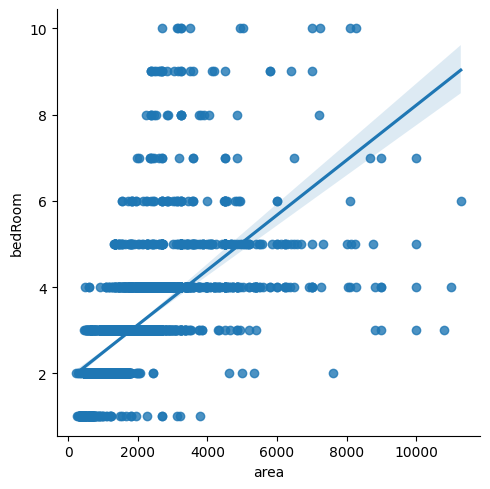

In [143]:
sns.lmplot(data=df, x='area', y='bedRoom');

In [144]:
# saving the dataset
interim_dir = data_dir / 'interim'
file_name = interim_dir / 'flat-house-dataset_v2.csv'

df.to_csv(file_name, index=False)